<a href="https://colab.research.google.com/github/areebaxijaz/AER850-Project-3/blob/main/AER850Project3_20epoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/MyDrive/ProjectthreeData/data'
data_yaml_path = f'{base_path}/data.yaml'

In [ ]:
!pip install opencv-python-headless ultralytics torch numpy pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 48.3 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from ultralytics import YOLO
from matplotlib import pyplot as plt



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Step 1: Image Masking using OpenCV

# Load the motherboard image
image_path = '/content/computermotherboard.jpeg'  # Replace with image path
image = cv2.imread(image_path)

# Convert image to grayscale for thresholding
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1.1: Apply thresholding
# Thresholding separates the background from the PCB based on pixel intensity
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# Step 1.2: Edge Detection
# Using Canny edge detection to detect the edges of the PCB
edges = cv2.Canny(gray_image, 100, 200)

# Step 1.3: Contour Detection
# Find contours based on the edges detected
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Filter contours by area to remove small irrelevant ones
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 100]


In [ ]:
# Step 1.4: Creating a mask from the contours
# Create a blank mask with the same dimensions as the image

mask = np.zeros_like(gray_image)

# Draw contours on the mask to isolate the PCB
cv2.drawContours(mask, filtered_contours, -1, (255), 3)

# Step 1.5: Apply the mask to the original image to extract the PCB
pcb_extracted = cv2.bitwise_and(image, image, mask=mask)

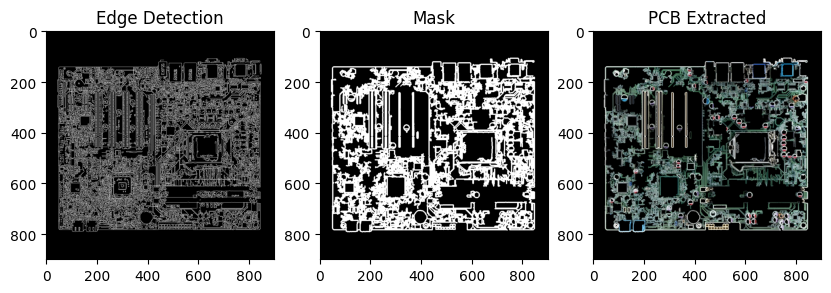

In [ ]:
# Display the masking results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title("Edge Detection")
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(pcb_extracted, cv2.COLOR_BGR2RGB))
plt.title("PCB Extracted")
plt.show()

In [ ]:
# Step 2: YOLOv8 Training with Google Colab GPU

# Load the YOLOv8 model (nano version)
model = YOLO('yolov8n.pt')


100%|██████████| 6.25M/6.25M [00:00<00:00, 268MB/s]


In [ ]:
# Training parameters
epochs = 20  # Number of training epochs (adjustable as needed)
batch_size = 10  # Number of images per batch
image_size = 900  # Image size for training

# Training using data.yaml, which should define paths to train, val, test datasets
model.train(
    data=data_yaml_path,  # Path to data.yaml file in Google Drive
    epochs=epochs,
    batch=batch_size,
    imgsz=image_size,
    name='pcb_component_detection_model'
)


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ProjectthreeData/data/data.yaml, epochs=20, time=None, patience=100, batch=10, imgsz=900, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pcb_component_detection_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

100%|██████████| 755k/755k [00:00<00:00, 105MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 277MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[900] must be multiple of max stride 32, updating to [928]


train: Scanning /content/drive/MyDrive/ProjectthreeData/data/train/labels... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [07:57<00:00,  1.14it/s]


train: New cache created: /content/drive/MyDrive/ProjectthreeData/data/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 108783. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/ProjectthreeData/data/valid/labels... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [01:38<00:00,  1.06it/s]

val: New cache created: /content/drive/MyDrive/ProjectthreeData/data/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 19108. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/pcb_component_detection_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 928 train, 928 val
Using 2 dataloader workers
Logging results to runs/detect/pcb_component_detection_model
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      15.5G      2.157       4.23      1.262       1299        928: 100%|██████████| 55/55 [00:44<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.34s/it]

                   all        105      19108     0.0298      0.147     0.0481     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      15.2G      2.263       3.19      1.131       1047        928: 100%|██████████| 55/55 [00:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        105      19108      0.208      0.138     0.0694      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      14.2G      2.249      2.715      1.104       1306        928: 100%|██████████| 55/55 [00:35<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        105      19108      0.499       0.13       0.11     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      14.8G      2.164      2.403      1.085        816        928: 100%|██████████| 55/55 [00:35<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]

                   all        105      19108      0.581      0.134      0.116     0.0625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      11.2G      2.151      2.232      1.082       1088        928: 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.00it/s]

                   all        105      19108      0.586      0.168      0.151     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      11.5G      2.062      2.084       1.06       1073        928: 100%|██████████| 55/55 [00:32<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.36s/it]

                   all        105      19108      0.557       0.17      0.155     0.0898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      12.3G      2.027      1.965      1.051       1935        928: 100%|██████████| 55/55 [00:34<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        105      19108      0.537      0.212       0.18      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      14.7G      1.983      1.904      1.044       1199        928: 100%|██████████| 55/55 [00:34<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]

                   all        105      19108      0.497      0.244      0.213      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      9.73G      1.959      1.843      1.034        846        928: 100%|██████████| 55/55 [00:34<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.23s/it]

                   all        105      19108      0.585      0.269      0.244      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      14.9G       1.95      1.812      1.034       1506        928: 100%|██████████| 55/55 [00:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]

                   all        105      19108      0.575      0.282      0.254      0.162


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      13.9G      1.963      1.922      1.051        495        928: 100%|██████████| 55/55 [00:39<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.66s/it]

                   all        105      19108      0.565      0.263      0.242      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      13.9G      1.923      1.814      1.029        362        928: 100%|██████████| 55/55 [00:29<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]

                   all        105      19108       0.62      0.257      0.275      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      10.4G      1.897      1.746      1.025       1057        928: 100%|██████████| 55/55 [00:31<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.47s/it]

                   all        105      19108      0.587      0.308      0.288      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      12.9G      1.857      1.688      1.013        503        928: 100%|██████████| 55/55 [00:32<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]

                   all        105      19108      0.668      0.283      0.309      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      9.86G      1.856      1.676       1.01        821        928: 100%|██████████| 55/55 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.14s/it]

                   all        105      19108      0.643      0.304      0.326      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      12.7G      1.832      1.667      1.008        585        928: 100%|██████████| 55/55 [00:31<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.45s/it]

                   all        105      19108      0.675      0.289      0.325      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      14.8G      1.806      1.628      1.003        875        928: 100%|██████████| 55/55 [00:30<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.60s/it]

                   all        105      19108      0.608      0.318      0.339      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.72G      1.818      1.625      1.005        578        928: 100%|██████████| 55/55 [00:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.39s/it]

                   all        105      19108      0.678      0.314      0.339      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      13.4G      1.794      1.597     0.9966        720        928: 100%|██████████| 55/55 [00:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]

                   all        105      19108       0.68      0.306       0.34      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      14.6G      1.804        1.6      1.003        384        928: 100%|██████████| 55/55 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

                   all        105      19108       0.68       0.31      0.348      0.236



20 epochs completed in 0.237 hours.
Optimizer stripped from runs/detect/pcb_component_detection_model/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/pcb_component_detection_model/weights/best.pt, 6.3MB

Validating runs/detect/pcb_component_detection_model/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 2/6 [00:04<00:09,  2.25s/it]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 3/6 [00:18<00:23,  7.75s/it]

WARNING ⚠️ NMS time limit 3.000s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:32<00:00,  5.39s/it]


                   all        105      19108      0.681      0.308      0.346      0.235
                Button         14         45      0.597      0.561       0.65      0.521
             Capacitor        104       7251      0.542      0.278      0.355      0.165
             Connector         76        659      0.538      0.718      0.667      0.474
                 Diode         11         53          1          0     0.0514     0.0257
Electrolytic Capacitor         15        160      0.693      0.525      0.634      0.441
                    IC         95       1322      0.606      0.828      0.788      0.539
              Inductor         12         45          1          0     0.0326     0.0283
                   Led         18        127          1          0       0.16      0.125
                  Pads         20        143          1          0     0.0212     0.0127
                  Pins         10        151      0.328      0.517      0.344      0.206
              Resisto

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9c4890d7b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [ ]:
# Step 3: YOLOv8 Evaluation on Test Images

# Paths to test images for evaluation
test_image_paths = [
    f'{base_path}/evaluation/ardmega.jpg',
    f'{base_path}/evaluation/arduno.jpg',
    f'{base_path}/evaluation/rasppi.jpg'
]


image 1/1 /content/drive/MyDrive/ProjectthreeData/data/evaluation/ardmega.jpg: 832x928 7 Capacitors, 4 Connectors, 7 ICs, 14 Resistors, 38.4ms
Speed: 6.6ms preprocess, 38.4ms inference, 1.6ms postprocess per image at shape (1, 3, 832, 928)


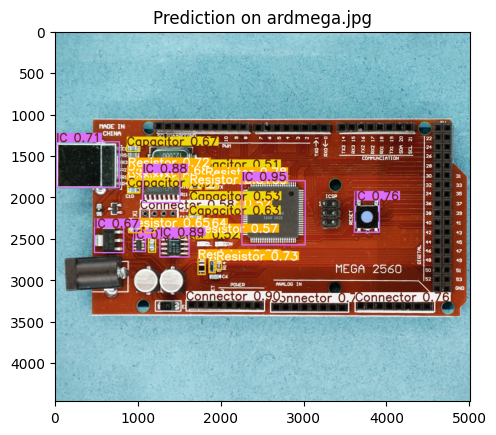


image 1/1 /content/drive/MyDrive/ProjectthreeData/data/evaluation/arduno.jpg: 640x928 11 Capacitors, 3 Connectors, 4 ICs, 37.4ms
Speed: 4.2ms preprocess, 37.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 928)


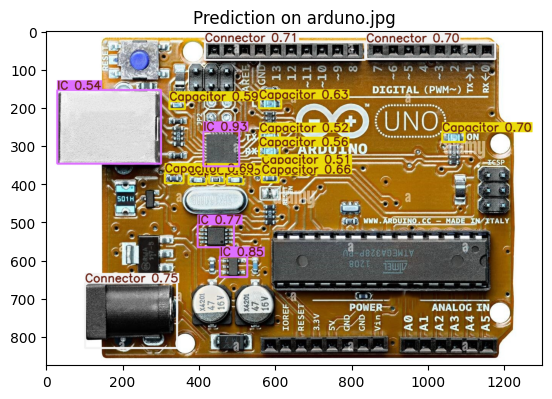


image 1/1 /content/drive/MyDrive/ProjectthreeData/data/evaluation/rasppi.jpg: 640x928 6 Capacitors, 7 Connectors, 8 ICs, 11.7ms
Speed: 10.4ms preprocess, 11.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 928)


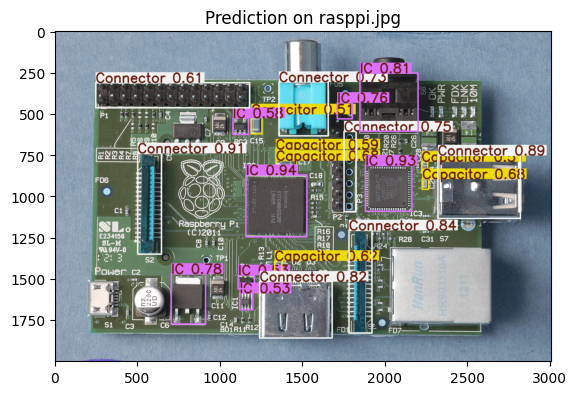

In [ ]:
# Evaluate each test image
for image_path in test_image_paths:
    results = model.predict(source=image_path, conf=0.5)  # Confidence threshold at 0.5

    # Display prediction results
    for result in results:
        plt.imshow(result.plot())  # Plot prediction results on the image
        plt.title(f"Prediction on {image_path.split('/')[-1]}")
        plt.show()